# Importing libraries 

In [896]:
import warnings
warnings.filterwarnings('ignore')

In [897]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Reading Data File 

In [898]:
df = pd.read_csv(r'Country-data.csv') 

## Checking for value, shape and null values in the data  

In [899]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [900]:
df.shape

(167, 10)

In [901]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 12.4+ KB


## Checking for the outliears in the dataset

In [902]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


## As we can see from the above that there is a huge difference between 75% and max values of chihld_mort, exports, health, imports, income, inflation , gdpp etc.
## This indicates that there are outliers present in these variables

# Analysis for outliears for the above mentioned variables using box plot 


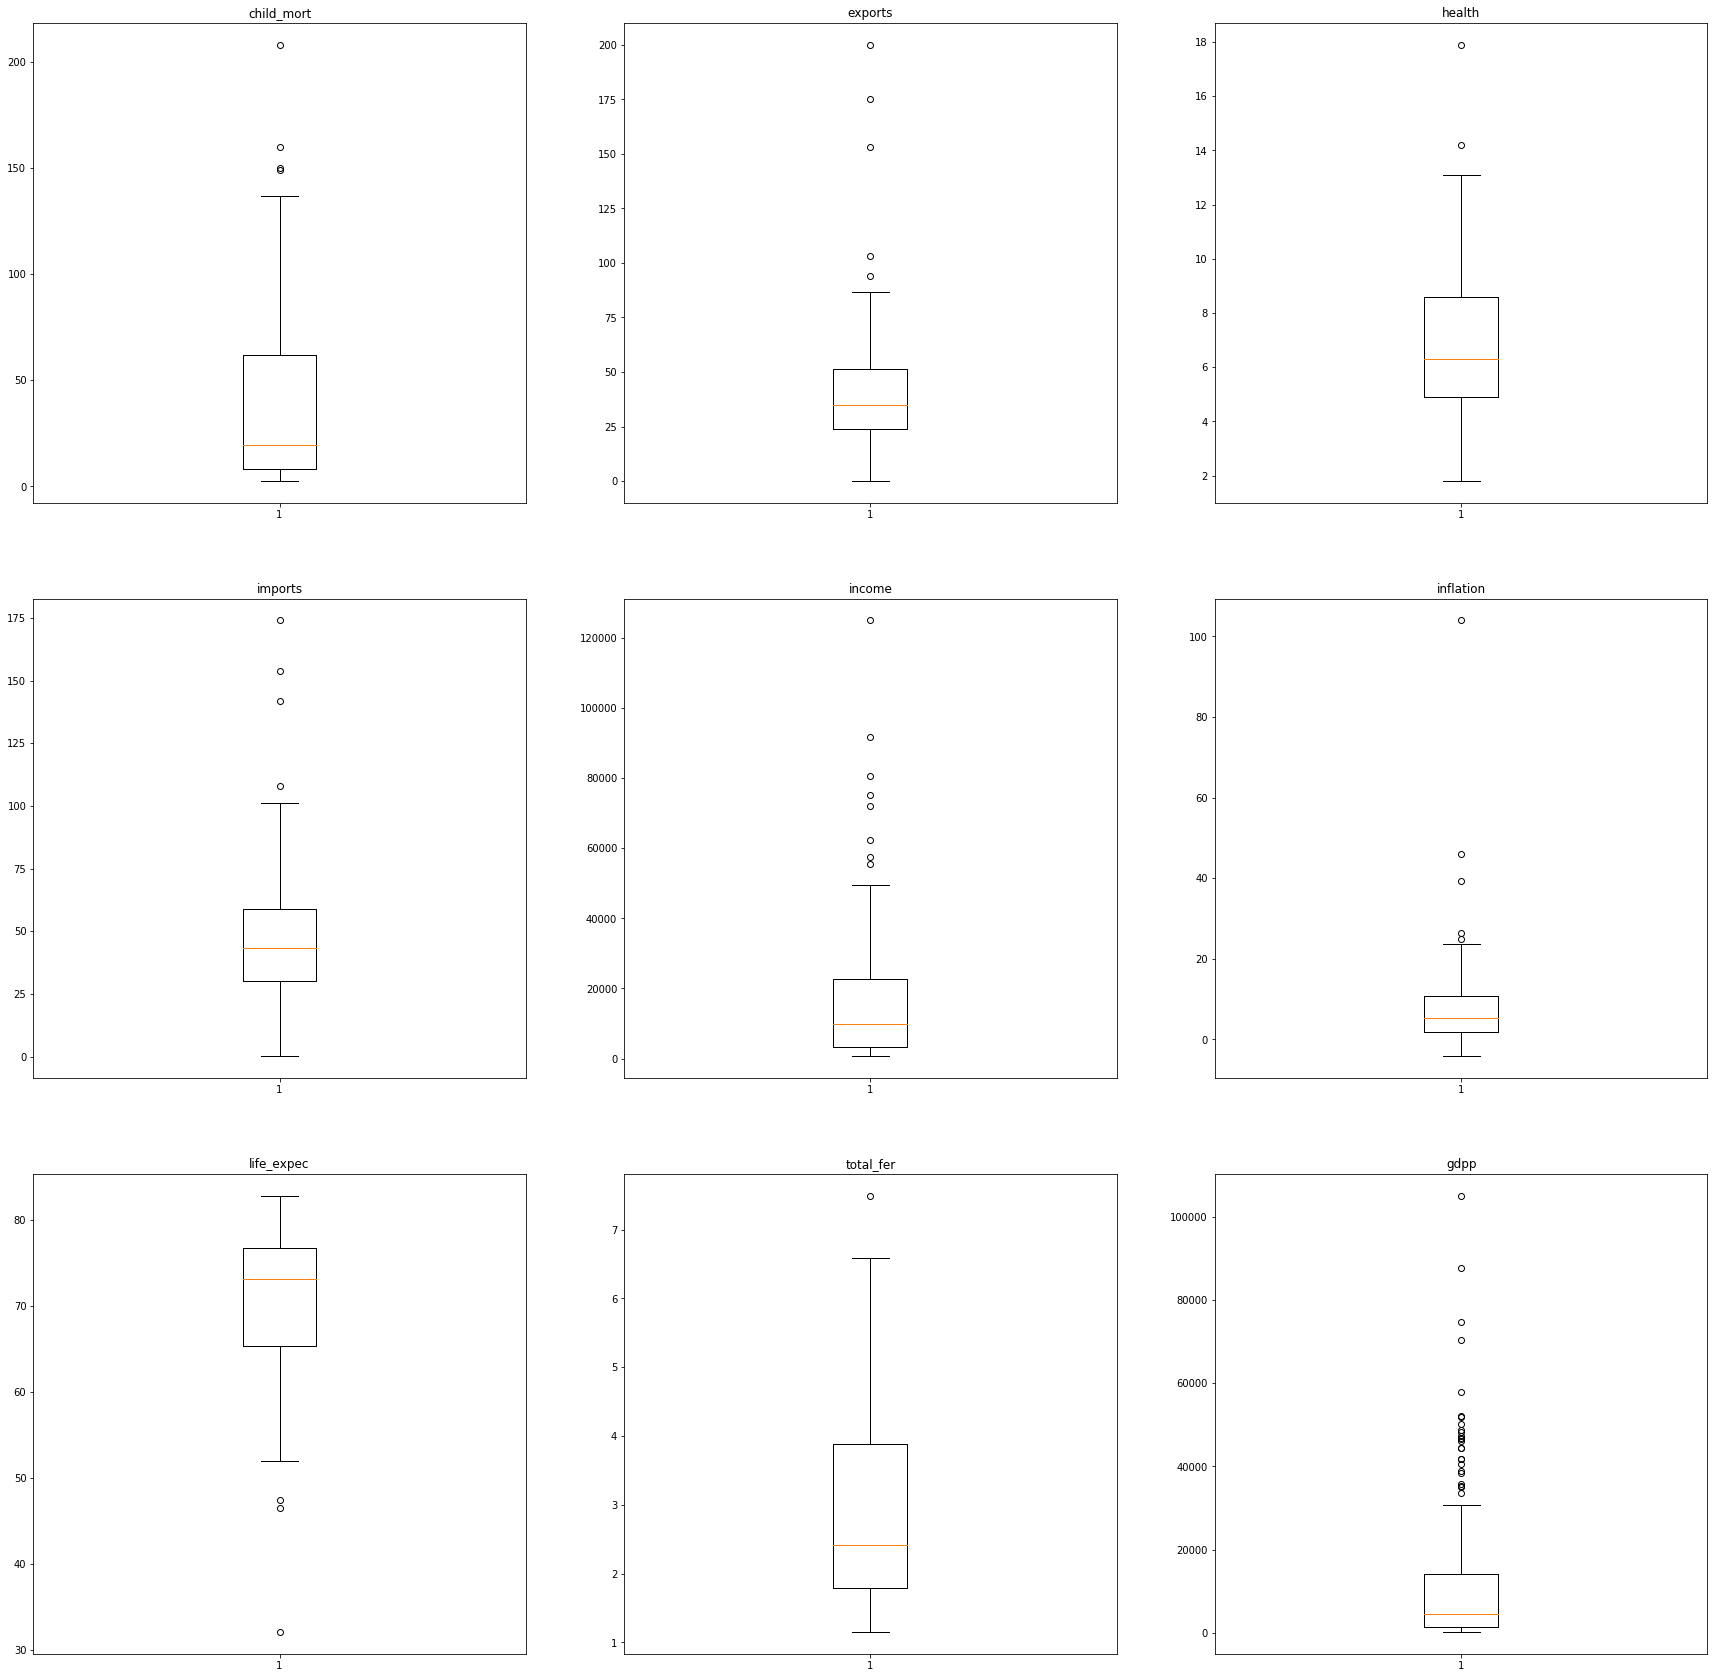

In [903]:
plt.figure(figsize=(30, 30))
var=df.columns[1:]
for i in enumerate(var):
    plt.subplot(3,3,i[0]+1)
    plt.boxplot(df[i[1]])
    plt.title(str(i[1]))

### As in the box plots we can see that some of the features like income, gdpp have outliers which may hamper our analysis and model therefore we have done capping on the upper limit for the same

In [904]:
q4 = df['income'].quantile(0.99)
df['income'][df['income']>= q4] = q4
q4 = df['gdpp'].quantile(0.99)
df['gdpp'][df['gdpp']>= q4] = q4

### Standardizing the features which are in terms of the % of GDPP

In [905]:
df['exports'] = df['exports'] * df['gdpp']/100
df['imports'] = df['imports'] * df['gdpp']/100
df['health'] = df['health'] * df['gdpp']/100

### Top 10 Countries having highest Child Mortality Rate are present in Africa having poor healthcare facilities.


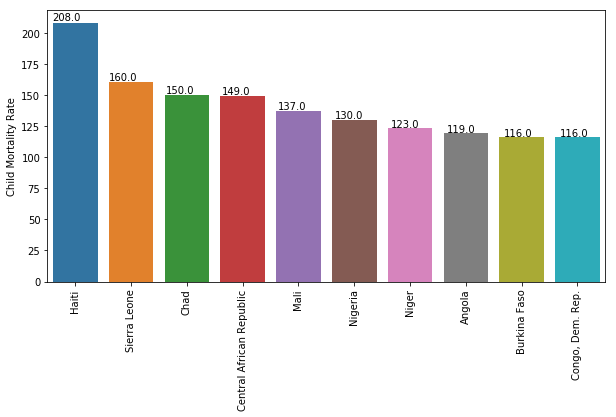

In [906]:
plt.figure(figsize = (10,5))
mort_top = df[['country','child_mort']].sort_values('child_mort', ascending = False).head(10)
gplot = sns.barplot(x='country', y='child_mort', data= mort_top)
for p in gplot.patches:
    gplot.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
gplot.set(xlabel = '', ylabel= 'Child Mortality Rate')
plt.xticks(rotation=90)
plt.show()

### Top 10 Countries having highest Fertility Rate are places where people are poorest in all.

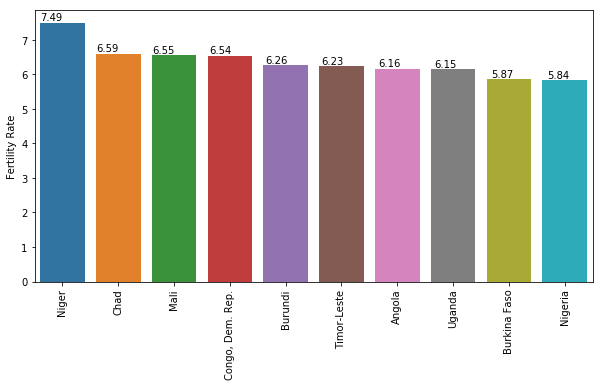

In [907]:
plt.figure(figsize = (10,5))
top10_fer = df[['country','total_fer']].sort_values('total_fer', ascending = False).head(10)
gplot = sns.barplot(x='country', y='total_fer', data= top10_fer)
for p in gplot.patches:
    gplot.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
gplot.set(xlabel = '', ylabel= 'Fertility Rate')
plt.xticks(rotation=90)
plt.show()

### Top 10 Countries having lowest Life Expectancy are places where healthcare system is not available or efficient.

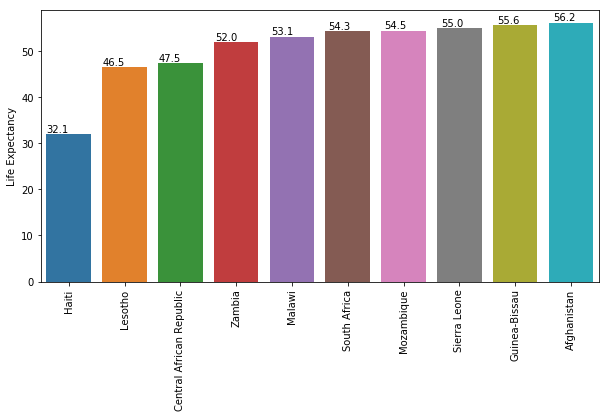

In [908]:
plt.figure(figsize = (10,5))
bttm_life = df[['country','life_expec']].sort_values('life_expec', ascending = True).head(10)
gplot = sns.barplot(x='country', y='life_expec', data= bttm_life)
for p in gplot.patches:
    gplot.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
gplot.set(xlabel = '', ylabel= 'Life Expectancy')
plt.xticks(rotation=90)
plt.show()

### Top 10 Countries having lowest health spending have per Capita income is very high

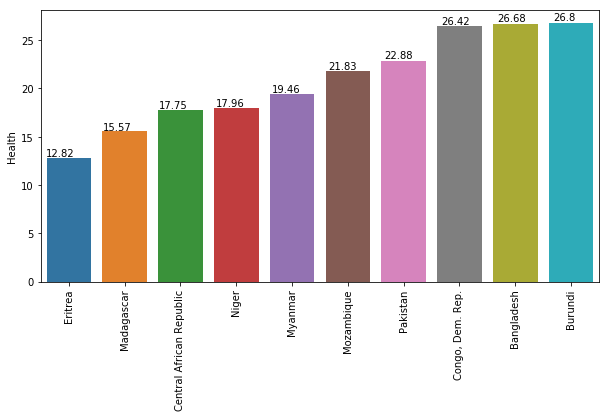

In [909]:
plt.figure(figsize = (10,5))
bttm_hlth = df[['country','health']].sort_values('health', ascending = True).head(10)
gplot = sns.barplot(x='country', y='health', data= bttm_hlth)
for p in gplot.patches:
    gplot.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
gplot.set(xlabel = '', ylabel= 'Health')
plt.xticks(rotation=90)
plt.show()

### Top 10 Countries having lowest GDP per capita

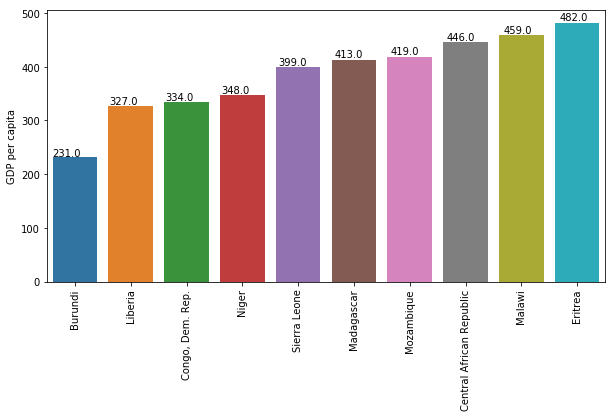

In [910]:
plt.figure(figsize = (10,5))
gdpp_bttm = df[['country','gdpp']].sort_values('gdpp', ascending = True).head(10)
gplot = sns.barplot(x='country', y='gdpp', data= gdpp_bttm)
for p in gplot.patches:
    gplot.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
gplot.set(xlabel = '', ylabel= 'GDP per capita')
plt.xticks(rotation=90)
plt.show()

### Top 10 Countries having lowest Per capita Income

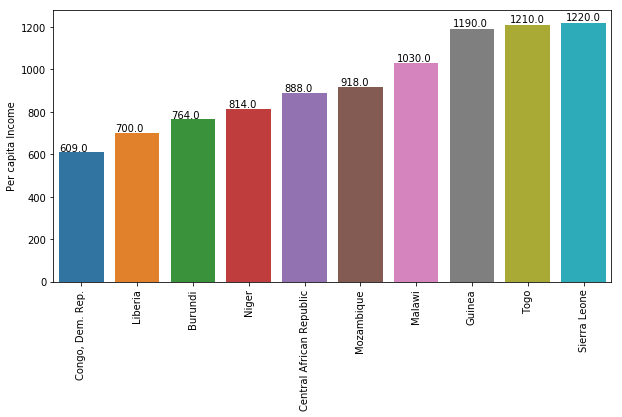

In [911]:
plt.figure(figsize = (10,5))
incm_bttm = df[['country','income']].sort_values('income', ascending = True).head(10)
gplot = sns.barplot(x='country', y='income', data= incm_bttm)
for p in gplot.patches:
    gplot.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
gplot.set(xlabel = '', ylabel= 'Per capita Income')
plt.xticks(rotation=90)
plt.show()

### Top 10 Countries having highest Inflation are from countries

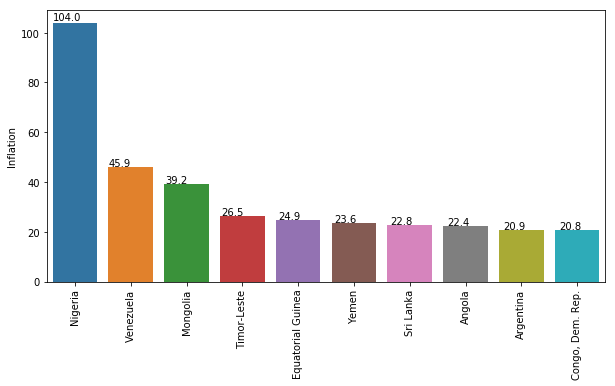

In [912]:
plt.figure(figsize = (10,5))
infltn_top = df[['country','inflation']].sort_values('inflation', ascending = False).head(10)
gplot = sns.barplot(x='country', y='inflation', data= infltn_top)
for p in gplot.patches:
    gplot.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
gplot.set(xlabel = '', ylabel= 'Inflation')
plt.xticks(rotation=90)
plt.show()

### Top 10 Countries having lowest Exports


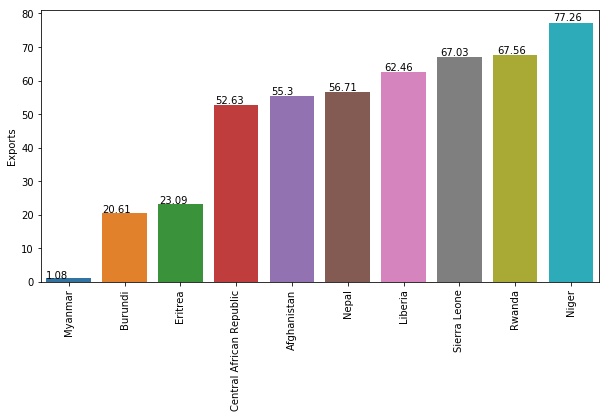

In [913]:
plt.figure(figsize = (10,5))
exp_bttm = df[['country','exports']].sort_values('exports', ascending = True).head(10)
gplot = sns.barplot(x='country', y='exports', data= exp_bttm)
for p in gplot.patches:
    gplot.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
gplot.set(xlabel = '', ylabel= 'Exports')
plt.xticks(rotation=90)
plt.show()

### Top 10 Countries having lowest Imports

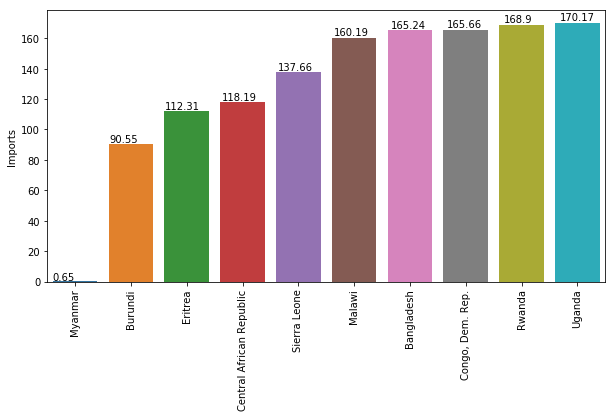

In [914]:
plt.figure(figsize = (10,5))
imp_bttm = df[['country','imports']].sort_values('imports', ascending = True).head(10)
gplot = sns.barplot(x='country', y='imports', data= imp_bttm)
for p in gplot.patches:
    gplot.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
gplot.set(xlabel = '', ylabel= 'Imports')
plt.xticks(rotation=90)
plt.show()

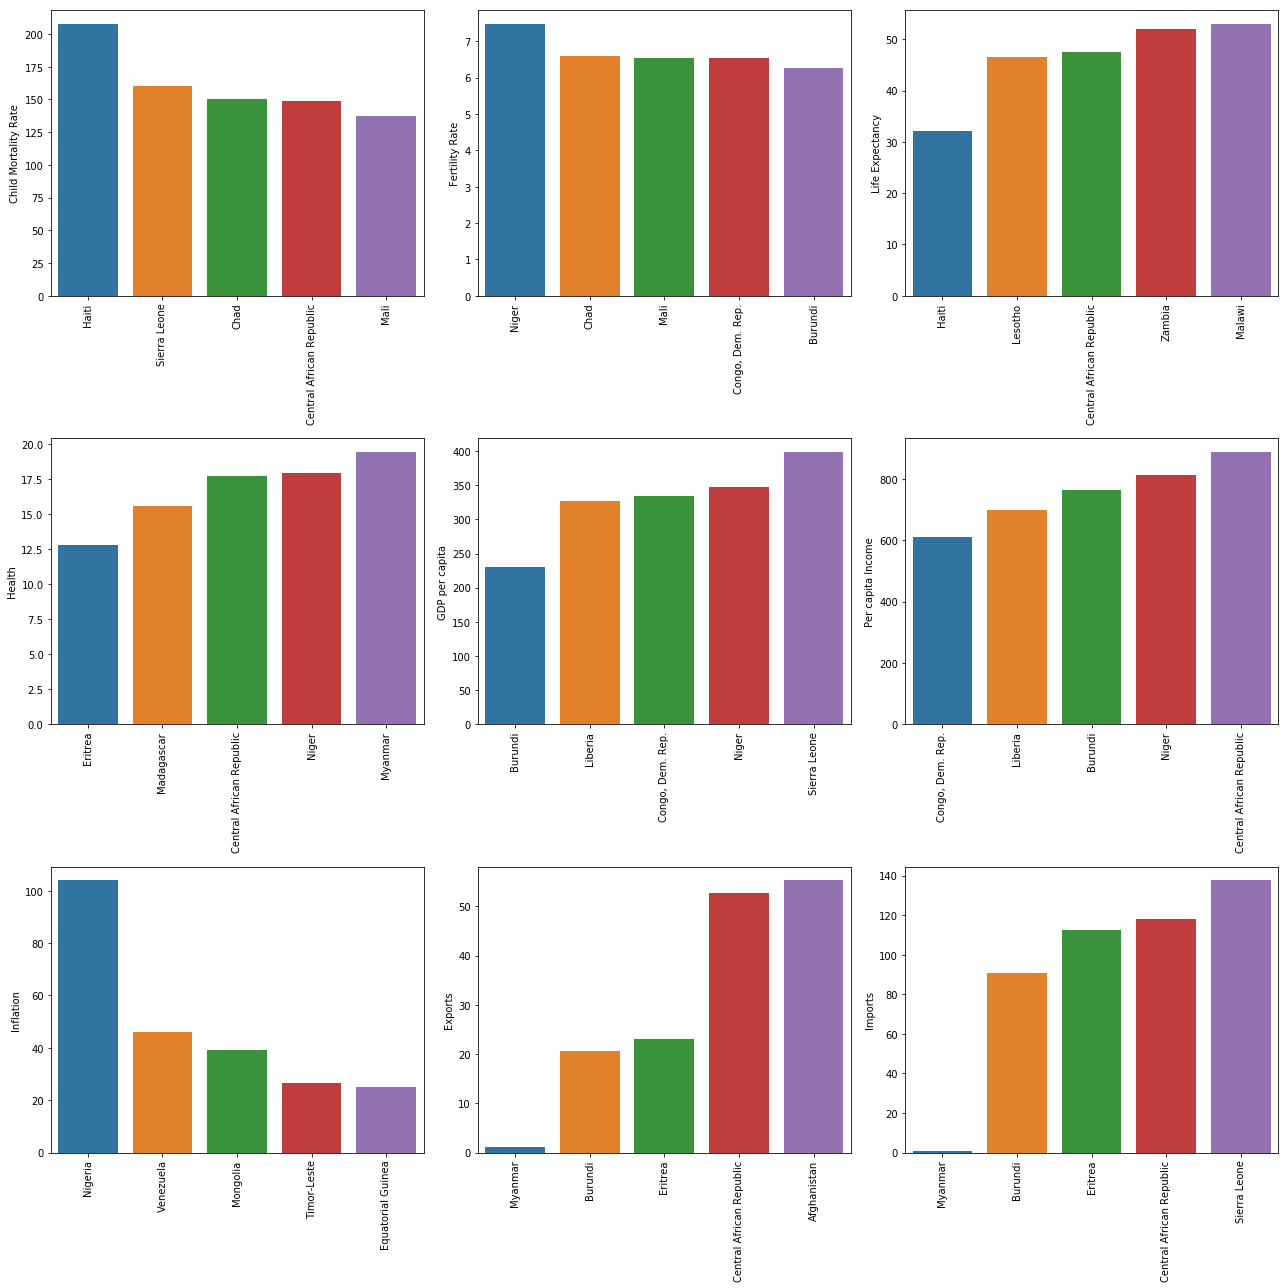

In [946]:
fig, axs = plt.subplots(3,3,figsize = (18,18))

# Child Mortality Rate : Death of children under 5 years of age per 1000 live births

child_mort = df[['country','child_mort']].sort_values('child_mort', ascending = False).head()
gplot = sns.barplot(x='country', y='child_mort', data= child_mort, ax = axs[0,0])
gplot.set(xlabel = '', ylabel= 'Child Mortality Rate')

# Fertility Rate: The number of children that would be born to each woman if the current age-fertility rates remain the same
total_fer = df[['country','total_fer']].sort_values('total_fer', ascending = False).head()
gplot = sns.barplot(x='country', y='total_fer', data= total_fer, ax = axs[0,1])
gplot.set(xlabel = '', ylabel= 'Fertility Rate')

# Life Expectancy: The average number of years a new born child would live if the current mortality patterns are to remain same

life_expec = df[['country','life_expec']].sort_values('life_expec', ascending = True).head()
gplot = sns.barplot(x='country', y='life_expec', data= life_expec, ax = axs[0,2])
gplot.set(xlabel = '', ylabel= 'Life Expectancy')

# Health :Total health spending as %age of Total GDP.

bttm_health = df[['country','health']].sort_values('health', ascending = True).head()
gplot = sns.barplot(x='country', y='health', data= bttm_health, ax = axs[1,0])
gplot.set(xlabel = '', ylabel= 'Health')

# The GDP per capita : Calculated as the Total GDP divided by the total population.

bttm_gdpp = df[['country','gdpp']].sort_values('gdpp', ascending = True).head()
gplot = sns.barplot(x='country', y='gdpp', data= bttm_gdpp, ax = axs[1,1])
gplot.set(xlabel = '', ylabel= 'GDP per capita')

# Per capita Income : Net income per person

bttm_incme = df[['country','income']].sort_values('income', ascending = True).head()
gplot = sns.barplot(x='country', y='income', data= bttm_incme, ax = axs[1,2])
gplot.set(xlabel = '', ylabel= 'Per capita Income')


# Inflation: The measurement of the annual growth rate of the Total GDP

inf_tp = df[['country','inflation']].sort_values('inflation', ascending = False).head()
gplot = sns.barplot(x='country', y='inflation', data= inf_tp, ax = axs[2,0])
gplot.set(xlabel = '', ylabel= 'Inflation')


# Exports: Exports of goods and services. Given as %age of the Total GDP

exp_bttm = df[['country','exports']].sort_values('exports', ascending = True).head()
gplot = sns.barplot(x='country', y='exports', data= exp_bttm, ax = axs[2,1])
gplot.set(xlabel = '', ylabel= 'Exports')


# Imports: Imports of goods and services. Given as %age of the Total GDP

imp_bttm = df[['country','imports']].sort_values('imports', ascending = True).head()
gplot = sns.barplot(x='country', y='imports', data= imp_bttm, ax = axs[2,2])
gplot.set(xlabel = '', ylabel= 'Imports')

for gplot in fig.axes:
    plt.sca(gplot)
    plt.xticks(rotation = 90)
    
plt.tight_layout()
plt.savefig('EDA')
plt.show()

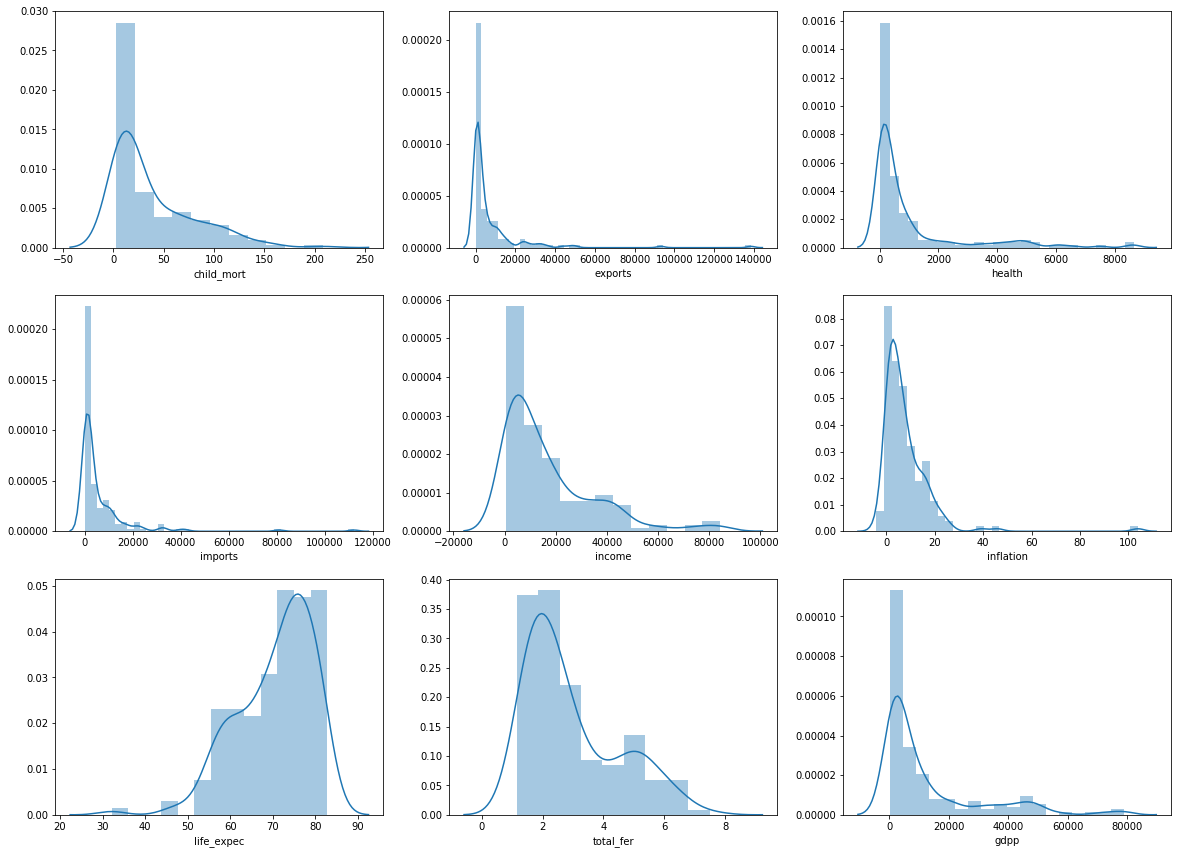

In [947]:
plt.figure(figsize = (20,20))
col_name=['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']
for i in enumerate(col_name):
    plt.subplot(4,3,i[0]+1)
    sns.distplot(df[i[1]])

# Data Preperation

In [916]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [917]:
hopkins(df.drop('country', axis=1))

0.9434663900281776

### As we can see that Hopkins score is around 94% which is a very good score and hence we can move forward with model building

## Standardizing the features 

In [918]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scale = scaler.fit_transform(df.drop('country', axis = 1))
df_scale

array([[ 1.29153238, -0.45990154, -0.5750735 , ..., -1.61909203,
         1.90288227, -0.70225949],
       [-0.5389489 , -0.38903467, -0.4448351 , ...,  0.64786643,
        -0.85997281, -0.49872564],
       [-0.27283273, -0.35213891, -0.49204428, ...,  0.67042323,
        -0.0384044 , -0.47743428],
       ...,
       [-0.37231541, -0.402169  , -0.54759012, ...,  0.28695762,
        -0.66120626, -0.65869853],
       [ 0.44841668, -0.4379438 , -0.56012307, ..., -0.34463279,
         1.14094382, -0.65869853],
       [ 1.11495062, -0.42837264, -0.54967069, ..., -2.09278484,
         1.6246091 , -0.6500669 ]])

In [919]:
df_scale = pd.DataFrame(df_scale, columns = df.columns[1:])
df_scale.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.459902,-0.575073,-0.482852,-0.851668,0.157336,-1.619092,1.902882,-0.702259
1,-0.538949,-0.389035,-0.444835,-0.345274,-0.386946,-0.312347,0.647866,-0.859973,-0.498726
2,-0.272833,-0.352139,-0.492044,-0.391726,-0.221053,0.789274,0.670423,-0.038404,-0.477434
3,2.007808,-0.320503,-0.541250,-0.382715,-0.612045,1.387054,-1.179234,2.128151,-0.530950
4,-0.695634,-0.102563,-0.175247,0.065857,0.125254,-0.601749,0.704258,-0.541946,-0.032042


## Checking Selhouette score and elbow curve

## Selhouette score

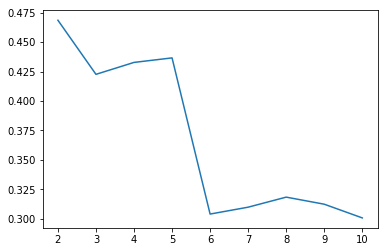

In [920]:
# Choose the value of K
# Silhouette score
# Elbow curve-ssd

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

ss = []
for k in range(2, 11):
    kmean = KMeans(n_clusters = k, max_iter=1000)
    kmean.fit(df_scale)
    ss.append([k, silhouette_score(df_scale, kmean.labels_)])
temp = pd.DataFrame(ss)    
plt.plot(temp[0], temp[1])

## Elbow curve

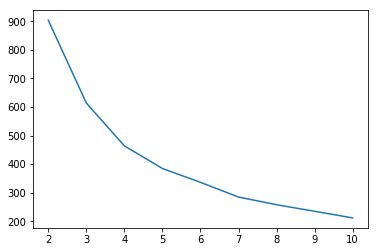

In [921]:
# elbpw curve
ssd = []
for k in range(2, 11):
    kmean = KMeans(n_clusters = k, max_iter=1000).fit(df_scale)
    ssd.append([k, kmean.inertia_])
    
temp = pd.DataFrame(ssd)
plt.plot(temp[0], temp[1])

# K Means Clustering

In [922]:
kmean = KMeans(n_clusters = 4, max_iter=1000, random_state = 1000)
kmean.fit(df_scale)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=1000, tol=0.0001, verbose=0)

In [923]:
df_kmean = df.copy()

In [924]:
# Label creation
label  = pd.DataFrame(kmean.labels_, columns= ['label'])
label.head()

,label
0,1
1,0
2,0
3,1
4,0


In [925]:
# Adding the cluster label to the inital DF
df_kmean = pd.concat([df_kmean, label], axis =1)
df_kmean.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,1
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,1
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,0


In [926]:
df_kmean['label'].value_counts()

0    88
1    48
2    29
3     2
Name: label, dtype: int64

### Plotting the clusters 

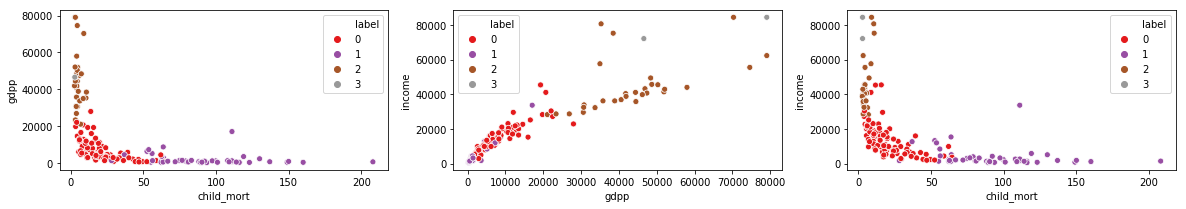

In [927]:
# Plot the cluster
plt.figure(figsize=(20, 10))
plt.subplot(3,3,1)
sns.scatterplot(x = 'child_mort', y = 'gdpp', hue = 'label', data = df_kmean, palette = 'Set1')
plt.subplot(3,3,2)
sns.scatterplot(x = 'gdpp', y = 'income', hue = 'label', data = df_kmean, palette = 'Set1')
plt.subplot(3,3,3)
sns.scatterplot(x = 'child_mort', y = 'income', hue = 'label', data = df_kmean, palette = 'Set1')

## Cluster Profiling

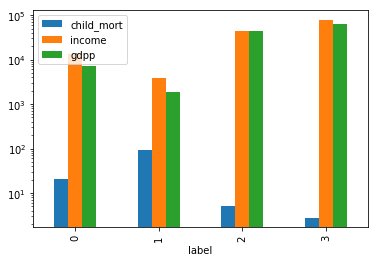

In [928]:
# Making sense out of the clsuters
df_kmean.drop(['country','exports','health','imports','inflation','life_expec','total_fer'], axis=1).groupby('label').mean().plot(kind = 'bar')
plt.yscale('log')

## Taking the cluster with Low income, Low GDP and High Child_mort
## Filter the data for that clsuter

In [929]:
# Low income, Low GDP and High Child_mort
# Filter the data for that clsuter
print(df_kmean[df_kmean['label'] == 1].count())
df_kmean[df_kmean['label'] == 1].head()


country       48
child_mort    48
exports       48
health        48
imports       48
income        48
inflation     48
life_expec    48
total_fer     48
gdpp          48
label         48
dtype: int64


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
0,Afghanistan,90.2,55.300,41.9174,248.297,1610.0,9.440,56.2,5.82,553.0,1
3,Angola,119.0,2199.190,100.6050,1514.370,5900.0,22.400,60.1,6.16,3530.0,1
17,Benin,111.0,180.404,31.0780,281.976,1820.0,0.885,61.8,5.36,758.0,1
21,Botswana,52.5,2768.600,527.0500,3257.550,13300.0,8.920,57.1,2.88,6350.0,1
25,Burkina Faso,116.0,110.400,38.7550,170.200,1430.0,6.810,57.9,5.87,575.0,1


## Top 5 countries with Low income, Low GDP and High Child_mort

In [930]:
df_kmean[df_kmean['label'] == 1].sort_values(by = ['child_mort', 'income', 'gdpp'],ascending=[False,True,True]).head()


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
66,Haiti,208.0,101.286,45.7442,428.314,1500.0,5.45,32.1,3.33,662.0,1
132,Sierra Leone,160.0,67.032,52.2690,137.655,1220.0,17.20,55.0,5.20,399.0,1
32,Chad,150.0,330.096,40.6341,390.195,1930.0,6.39,56.5,6.59,897.0,1
31,Central African Republic,149.0,52.628,17.7508,118.190,888.0,2.01,47.5,5.21,446.0,1
97,Mali,137.0,161.424,35.2584,248.508,1870.0,4.37,59.5,6.55,708.0,1


# Hierarichal Clustering

In [931]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

## Single Linkage` 

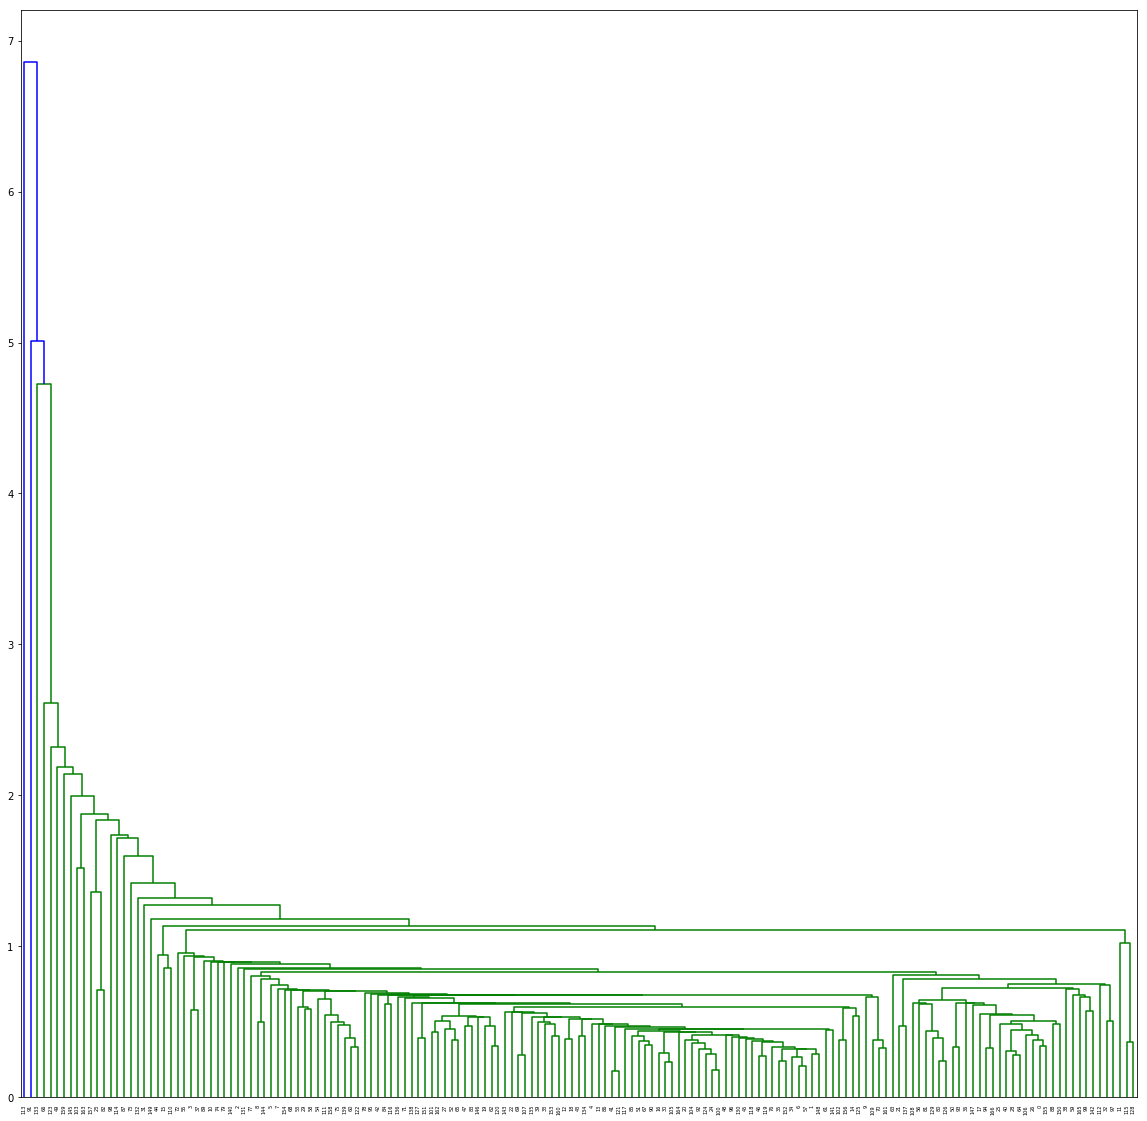

In [932]:
# Single linkage
df_hc=df_scale[['child_mort','income','gdpp']]
plt.figure(figsize=(20, 20))
mergings = linkage(df_scale, method='single',metric='euclidean')
dendrogram(mergings)
plt.show()

In [933]:
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 4).reshape(-1,))
df3 = pd.concat([df, clusterCut], axis=1)
df3.columns = df_kmean.columns
df3.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,0


In [934]:
df3.label.value_counts()

0    164
3      1
2      1
1      1
Name: label, dtype: int64

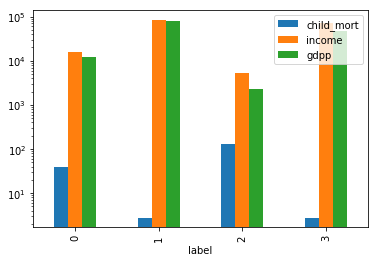

In [935]:
df3.drop(['country','exports','health','imports','inflation','life_expec','total_fer'], axis=1).groupby('label').mean().plot(kind = 'bar')
plt.yscale('log')

## Complete Linkage 

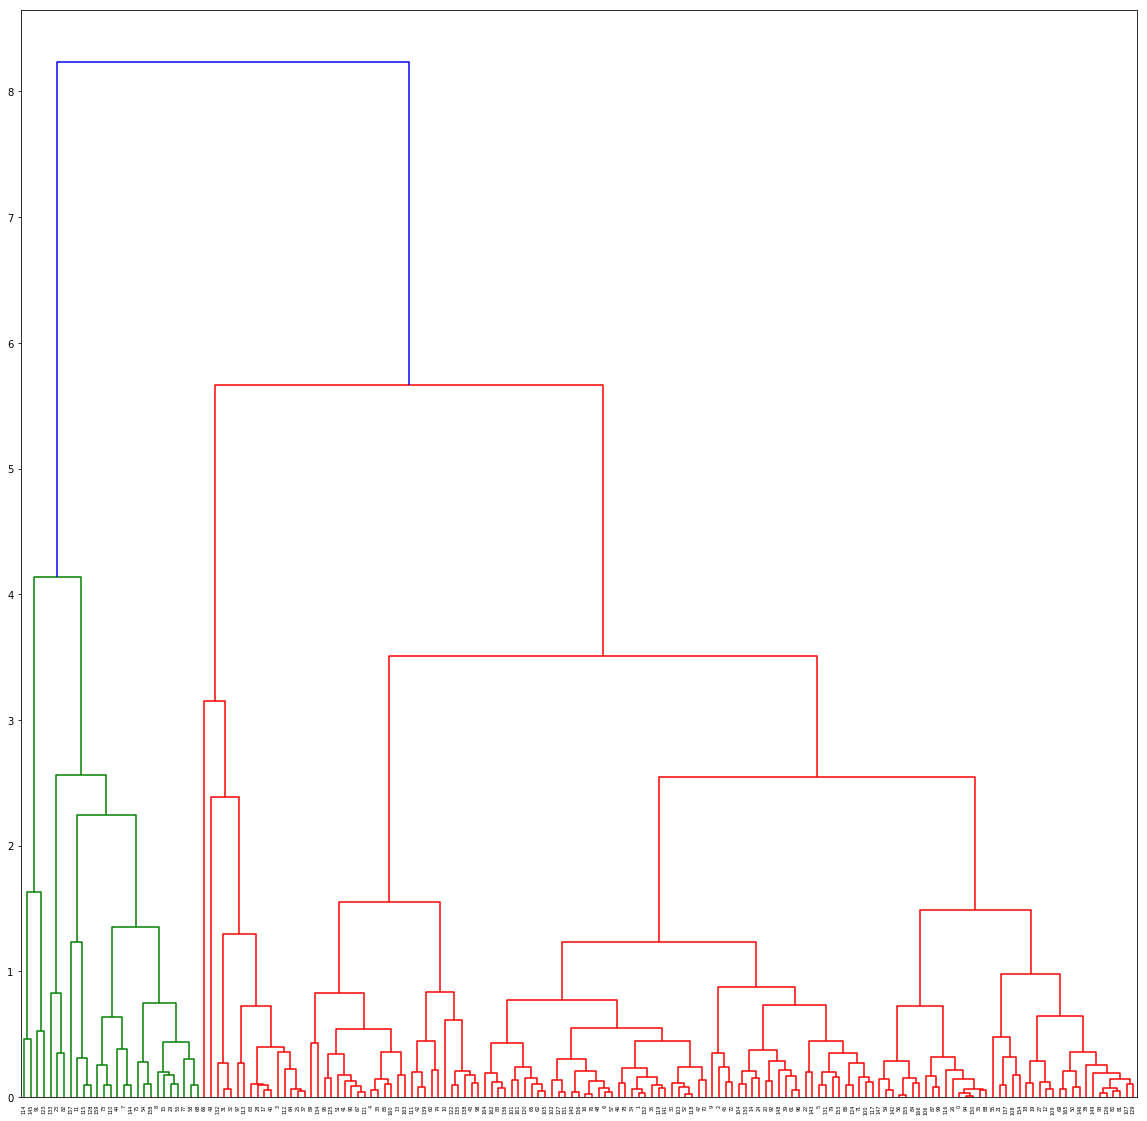

In [936]:
# Complete Linkage
plt.figure(figsize=(20, 20))
mergings1 = linkage(df_hc, method='complete',metric='euclidean')
dendrogram(mergings1)
plt.show()

## Creation of Clusters

In [937]:
# Let cut the tree at height of approx 3 to get 4 clusters and see if it get any better cluster formation.

clusterCut = pd.Series(cut_tree(mergings1, n_clusters = 4).reshape(-1,))
df3 = pd.concat([df, clusterCut], axis=1)
df3.columns = df_kmean.columns
df3.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,1
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,0


## Plotting the Cluster

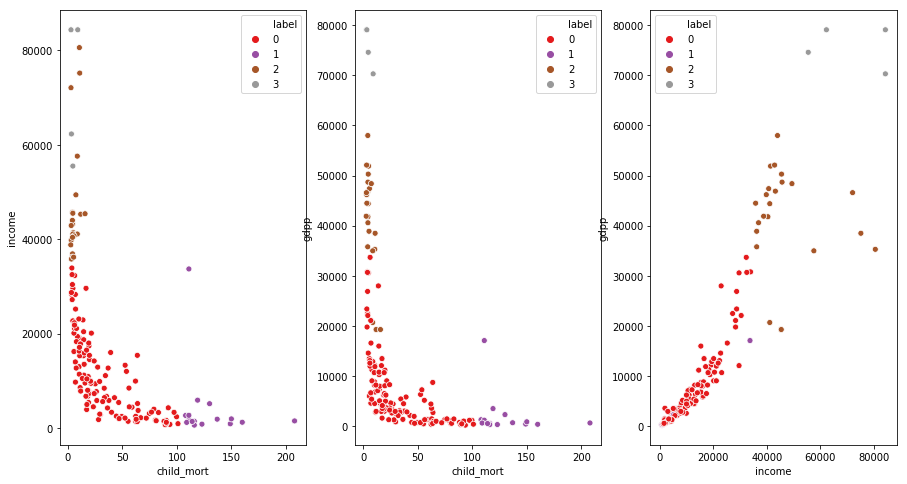

In [938]:

fig, axes = plt.subplots(1,3, figsize=(15,8))

sns.scatterplot(x='child_mort',y='income',hue='label',legend='full',palette="Set1",data=df3,ax=axes[0])
sns.scatterplot(x='child_mort',y='gdpp',hue='label',legend='full',palette="Set1",data=df3,ax=axes[1])
sns.scatterplot(x='income',y='gdpp',hue='label',legend='full',palette="Set1",data=df3,ax=axes[2])

plt.show()


In [939]:
df3.label.value_counts()

0    124
2     23
1     16
3      4
Name: label, dtype: int64

## Cluster Profilling

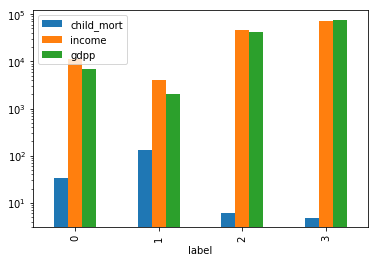

In [940]:
# Making sense out of the clsuters
df3.drop(['country','exports','health','imports','inflation','life_expec','total_fer'], axis=1).groupby('label').mean().plot(kind = 'bar')
plt.yscale('log')

In [941]:
df_clus1 = df3[df3['label'] ==1]
df_clus1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
3,Angola,119.0,2199.190,100.6050,1514.370,5900.0,22.400,60.1,6.16,3530.0,1
17,Benin,111.0,180.404,31.0780,281.976,1820.0,0.885,61.8,5.36,758.0,1
25,Burkina Faso,116.0,110.400,38.7550,170.200,1430.0,6.810,57.9,5.87,575.0,1
28,Cameroon,108.0,290.820,67.2030,353.700,2660.0,1.910,57.3,5.11,1310.0,1
31,Central African Republic,149.0,52.628,17.7508,118.190,888.0,2.010,47.5,5.21,446.0,1


## Top 5 country with high child mortality and low income and GDPP

In [942]:
df_clus1[df_clus1['label'] ==1].sort_values(by = ['child_mort', 'income', 'gdpp'],ascending=[False,True,True]).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
66,Haiti,208.0,101.286,45.7442,428.314,1500.0,5.45,32.1,3.33,662.0,1
132,Sierra Leone,160.0,67.032,52.2690,137.655,1220.0,17.20,55.0,5.20,399.0,1
32,Chad,150.0,330.096,40.6341,390.195,1930.0,6.39,56.5,6.59,897.0,1
31,Central African Republic,149.0,52.628,17.7508,118.190,888.0,2.01,47.5,5.21,446.0,1
97,Mali,137.0,161.424,35.2584,248.508,1870.0,4.37,59.5,6.55,708.0,1


## FInal list of countries which need aid 

In [956]:
df_final=pd.merge(df_kmean,df_clus1, how='inner', on=['country'])
print(df_final['country'])

0                       Angola
1                        Benin
2                 Burkina Faso
3                     Cameroon
4     Central African Republic
5                         Chad
6             Congo, Dem. Rep.
7                Cote d'Ivoire
8            Equatorial Guinea
9                       Guinea
10               Guinea-Bissau
11                       Haiti
12                        Mali
13                       Niger
14                     Nigeria
15                Sierra Leone
Name: country, dtype: object


# Conclusion
### Below is the key finding of the analysis of this case study: -
### - Countries having low GDP, Income and Healthcare system having high child mortality rate. 
### - Countries with high inflation rate having high child mortality rate.
### - Countries with high total fertility having high child mortality rate.
### - Final list of all the country which needs aid 
####      Angola, Benin, Burkina Faso, Cameroon, Central African Republic, Chad, Congo Dem. Rep., Cote d'Ivoire, Equatorial Guinea, Guinea, Guinea-Bissau, Haiti, Mali, Niger, Nigeria, Sierra Leone
### - Top 5 countries that are in the direst need of aidwith Low income, Low GDP and High Child_mort is below.
####   - Haiti
####   - Sierra Leone
####   - Chad
####   - Central African Republic
####   - Mali
